## El modelo conceptual de balance energético

El modelo climático que se utiliza en esta práctica pertenece a la familia de los **modelos de balance energético** (Energy Balance Models, EBM).

Estos modelos describen la evolución de la temperatura a partir del equilibrio entre:
- la energía que entra en el sistema climático en forma de radiación solar,
- la energía que sale en forma de radiación infrarroja,
- y el transporte interno de energía entre regiones.

En su versión más simple, el modelo representa la temperatura superficial media como función de la latitud φ y del tiempo t, y se basa en una ecuación de la forma:

C ∂Tₛ(φ,t)/∂t = ASR(φ,t) − OLR(Tₛ) + D[Tₛ]

donde:
- Tₛ es la temperatura superficial,
- C es una capacidad calorífica efectiva,
- ASR es la radiación solar absorbida,
- OLR es la radiación infrarroja emitida,
- D[Tₛ] representa el transporte meridional de energía.

Esta ecuación no pretende describir todos los procesos del sistema climático real, sino capturar **los mecanismos físicos esenciales** que controlan la distribución espacial y temporal de la temperatura.


A lo largo de estos Notebook aparecerán celdas de 'código' con las instrucciones que ejecutará Phyton para preparar o realizar los cálculos y simulaciones. 
En la siguiente se 'cargan' las librerias (conjuntos de código previos que facilitan el trabajo) que se van a necesitar.

De momento, lo único que debéis hacer es ejecutar estas celdas para que realizar las acciones programadas en ellas. En otros Notebooks tendréis que modificar algunos puntos específicos de las mismas.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import climlab


## Uso de un modelo predefinido

En esta práctica **no se construye un modelo desde cero**.  
El modelo ya está formulado e implementado en el paquete recién importado, 'climlab'.

La línea de código que aparece a continuación crea una **instancia** de un modelo climático 1D estacional ya definido. A partir de ese momento, el modelo puede:
- integrarse en el tiempo,
- producir salidas diagnósticas,
- responder a cambios en parámetros externos.

Esta forma de trabajo es habitual en climatología: los modelos se formulan previamente y se utilizan para realizar experimentos numéricos.


In [2]:
# Creación de una instancia del modelo climático 1D estacional
m = climlab.EBM_seasonal()


## Procesos físicos incluidos en el modelo

El modelo está compuesto por varios procesos que actúan de forma conjunta sobre la temperatura:

- radiación solar entrante (dependiente de latitud y estación),
- reflexión de la radiación solar (albedo),
- emisión infrarroja hacia el espacio,
- transporte de energía entre latitudes.

En climlab, estos procesos se representan como **subprocesos** que contribuyen al balance energético total.


In [3]:
# Subprocesos que componen el modelo
m.subprocess.keys()


dict_keys(['LW', 'insolation', 'albedo', 'SW', 'diffusion'])

Cada uno de estos subprocesos representa un término del balance energético:

- **insolation**: calcula la radiación solar entrante en función de la latitud y del día del año;
- **albedo / SW**: determina cuánta de esa radiación es absorbida;
- **LW**: representa la radiación infrarroja emitida por la superficie;
- **diffusion**: aproxima el transporte de energía desde regiones cálidas hacia regiones frías.

La temperatura evoluciona en el tiempo como resultado del efecto combinado de todos estos procesos.


## Qué se hará en los siguientes notebooks

En este cuaderno solo se ha introducido el modelo y su estructura general.

En los siguientes notebooks se realizarán experimentos numéricos para:
- analizar el tiempo de ajuste del sistema (*spin-up*),
- estudiar la respuesta del modelo a forzamientos radiativos,
- explorar el efecto de retroalimentaciones no lineales.

A partir de ahí, el modelo se utilizará como una herramienta experimental para interpretar procesos climáticos.


# Modelo climático 1D de balance energético (EBM)  
## Notebook 1 — El modelo, sus ecuaciones y su implementación en climlab

En este cuaderno se presenta y analiza un **modelo climático idealizado de balance energético unidimensional (1D)**, que describe la temperatura superficial media de la Tierra como función de la latitud y del momento del año.

El objetivo de este notebook es **entender el modelo climático que se va a utilizar en la práctica**, tanto desde el punto de vista conceptual (ecuaciones, procesos físicos, supuestos) como desde el punto de vista de su implementación numérica concreta mediante la librería **climlab**.

Este cuaderno cumple una función **explicativa y formativa**, no evaluable. En él se introducen:
- la ecuación de balance energético que define el modelo;
- los distintos términos físicos que intervienen (radiación entrante, radiación saliente y transporte de energía);
- la forma en que estos términos se representan y se combinan en el modelo numérico.

Las figuras que aparecen en este notebook **se generan directamente a partir del propio modelo**, y deben interpretarse como el comportamiento de un sistema climático idealizado y muy simplificado, no como datos observacionales reales o proyecciones realistas.

En los siguientes notebooks, este mismo modelo se utilizará como un **laboratorio numérico** para realizar experimentos y analizar su respuesta a distintos forzamientos.


## El modelo conceptual de balance energético

El modelo climático que se utiliza en esta práctica pertenece a la familia de los **modelos de balance energético** (Energy Balance Models, EBM).

Estos modelos describen la evolución de la temperatura a partir del equilibrio entre:
- la energía que entra en el sistema climático en forma de radiación solar,
- la energía que sale en forma de radiación infrarroja,
- y el transporte interno de energía entre regiones.

En su versión más simple, el modelo representa la temperatura superficial media como función de la latitud φ y del tiempo t, y se basa en una ecuación de la forma:

C ∂Tₛ(φ,t)/∂t = ASR(φ,t) − OLR(Tₛ) + D[Tₛ]

donde:
- Tₛ es la temperatura superficial en una determinada latitud φ en el tiempo t,
- C es la constante de la capacidad calorífica efectiva promedio del planeta,
- ASR es la radiación solar absorbida,
- OLR es la radiación infrarroja emitida,
- D[Tₛ] representa el transporte meridional de energía.

Esta ecuación no pretende describir todos los procesos del sistema climático real, sino dar un ejempl sencillo que captura mecanismos físicos esenciales que controlan la distribución espacial y temporal de la temperatura.


Es importante subrayar el nivel de idealización de este modelo:

- la temperatura se representa mediante un único valor superficial en cada latitud;
- no se resuelve explícitamente la dinámica atmosférica u oceánica;
- se obvian muchos procesos complejos que se agrupan en grandes procesos promedio;
- el transporte meridional se aproxima mediante un término difusivo.

A pesar de estas simplificaciones, los modelos EBM son extremadamente útiles para:
- entender el papel del balance energético en el clima;
- analizar respuestas a forzamientos externos;
- estudiar efectos no lineales y retroalimentaciones.

En este sentido, deben interpretarse como **modelos conceptuales cuantitativos**, no como simulaciones realistas del clima terrestre.


La ecuación de balance energético descrita anteriormente no se resuelve de forma analítica, sino mediante integración numérica.

En la práctica, esto implica:
- discretizar la latitud en un conjunto finito de bandas o franjas zonales;
- calcular los distintos términos del balance energético en cada una de ellas;
- resolver o integrar la ecuación en el tiempo mediante pasos discretos.

La librería **climlab** proporciona implementaciones numéricas de este tipo de modelos, permitiendo centrarse en el análisis físico sin necesidad de programar desde cero los cálculos necesarios.


La siguiente celda es la primera del Notebook que contiene 'código', instrucciones que se pasan a Phyton para que pueda realizar las instrucciones pedidas.

Su función es cargar 'librerias', paquetes de código previo que contienen funciones bien programadas y testadas, listas para ser utilizadas. De momento, lo unico que debe hacer es 'ejecutarlas' (Mayúsc + Entrar):

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import climlab


## Creación del modelo climático 1D estacional

Una vez introducido el modelo conceptual, pasamos a su implementación numérica concreta mediante climlab.

En esta práctica se utiliza el modelo ya diseñado en esta librería, denominado `EBM_seasonal`, que corresponde a un modelo de balance energético:
- unidimensional en latitud;
- con variación estacional de la radiación solar;
- con transporte meridional idealizado.

Crear el modelo en climlab consiste en instanciar este objeto, es decir, que a partir de este momento hay un objeto que contiene:
- la variable de estado (temperatura superficial);
- los parámetros físicos;
- los procesos que contribuyen al balance energético.


In [3]:
# Creación de una instancia del modelo climático 1D estacional
m = climlab.EBM_seasonal()


El modelo no resuelve la ecuación de balance energético como una única expresión, sino como la suma de varios **procesos físicos independientes** que actúan simultáneamente sobre la temperatura.

Cada uno de estos procesos representa un término concreto de la ecuación de balance energético introducida anteriormente.

A continuación le pedimos que muestre los procesos que componen este modelo.


In [4]:
# Subprocesos que componen el modelo
m.subprocess.keys()


dict_keys(['LW', 'insolation', 'albedo', 'SW', 'diffusion'])

Cada uno de los subprocesos del modelo corresponde a un término físico del balance energético:

- **insolation**  
  Calcula la radiación solar entrante en la parte superior de la atmósfera, en función de la latitud y del día del año.

- **albedo** y **SW**  
  Determinan qué fracción de la radiación solar entrante es absorbida por el sistema climático, dando lugar a la radiación solar absorbida (ASR).

- **LW**  
  Representa la radiación infrarroja emitida hacia el espacio (OLR), parametrizada como una función de la temperatura superficial.

- **diffusion**  
  Aproxima el transporte meridional de energía desde regiones más cálidas hacia regiones más frías mediante un término difusivo.

La evolución temporal de la temperatura resulta de la acción combinada de todos estos procesos.


El modelo tiene una única variable de estado: la **temperatura superficial** Tₛ.

Esta temperatura está definida:
- en cada banda latitudinal del modelo;
- y evoluciona en el tiempo como resultado del balance energético local y del transporte entre latitudes.

A continuación le pedimos que muestre el estado inicial de la temperatura superficial tal como se usa por defecto en el modelo.


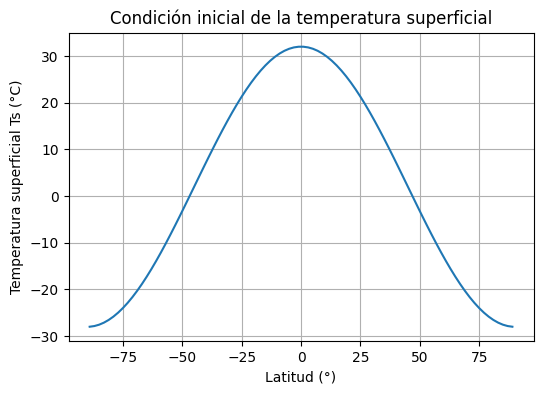

In [5]:
# Coordenada latitudinal
lat = m.state['Ts'].domain.axes['lat'].points

# Temperatura superficial inicial
Ts0 = np.array(m.state['Ts']).ravel()

plt.figure(figsize=(6,4))
plt.plot(lat, Ts0)
plt.xlabel("Latitud (°)")
plt.ylabel("Temperatura superficial Ts (°C)")
plt.title("Condición inicial de la temperatura superficial")
plt.grid(True)
plt.show()


La figura muestra la **condición inicial** de la temperatura superficial con la que comienza la integración del modelo.

Esta condición inicial:
- no representa un estado de equilibrio;
- es simplemente un punto de partida para la integración temporal.

En los modelos climáticos sencillos, la temperatura inicial puede no ser relevante a largo plazo, si el sistema tiende a perder la memoria de las condiciones iniciales y a converger siempre a unos valores determinados únicmaente por los forzamientos y parámetros del modelo.

Este proceso de ajuste en el tiempo hacia una solución se denomina *spin-up* y se estudiará con más detalle en el siguiente notebook.


## Radiación solar entrante y radiación solar absorbida (ASR)

El término **ASR(φ,t)** (Absorbed Shortwave Radiation) representa la energía solar que el sistema climático **absorbe** en una latitud φ y un instante t.

De forma conceptual puede escribirse como:

ASR(φ,t) = Q(φ,t) · (1 − α(φ,t))

donde:
- **Q(φ,t)** es la radiación solar entrante en la parte superior de la atmósfera (depende de la geometría Sol–Tierra y del día del año),
- **α(φ,t)** es el albedo efectivo (fracción reflejada).

En esta primera versión del modelo (“albedo suave” o constante), el albedo no depende de la temperatura: su objetivo es proporcionar un comportamiento simple y reversible.


In [6]:
# A partir de aquí avanzamos el modelo para analizar la insolación y la ASR
# No se modifica ningún parámetro físico del modelo

lat = m.state['Ts'].domain.axes['lat'].points

# Paso temporal (segundos -> días)
dt_days = m.timestep / 86400.0
nsteps_year = int(round(365.0 / dt_days))

Q_year = np.zeros((len(lat), nsteps_year))
ASR_year = np.zeros((len(lat), nsteps_year))

for k in range(nsteps_year):
    m.step_forward()
    Q_year[:, k] = np.array(m.diagnostics['insolation']).ravel()
    ASR_year[:, k] = np.array(m.diagnostics['ASR']).ravel()

time_days = np.arange(nsteps_year) * dt_days



### Figura 1 — Radiación solar entrante Q(φ,t) en distintas estaciones

La siguiente figura muestra la radiación solar entrante (en la parte superior de la atmósfera) como función de la latitud para varios momentos del año representativos.

Debe observarse que:
- la distribución cambia con la estación;
- el contraste estacional es pequeño cerca del ecuador y mayor hacia altas latitudes;
- la insolación máxima se desplaza entre hemisferios a lo largo del año.


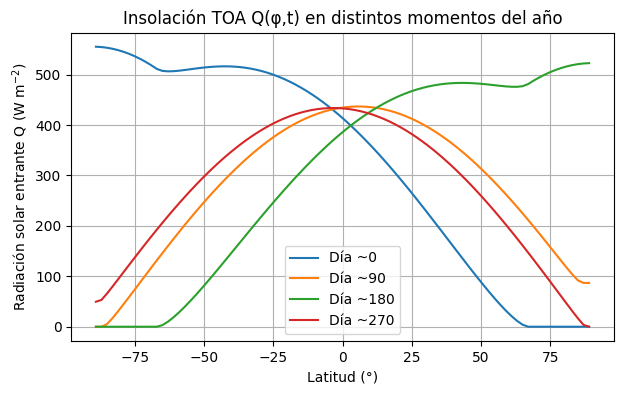

In [7]:
# Días del año aproximados: equinoccios y solsticios (0 corresponde al 1 de Enero; 365 al 31 de diciembre)
days_to_plot = [0, 90, 180, 270]
idx = [int(np.argmin(np.abs(time_days - d))) for d in days_to_plot]

plt.figure(figsize=(7,4))
for d, i in zip(days_to_plot, idx):
    plt.plot(lat, Q_year[:, i], label=f"Día ~{d}")

plt.xlabel("Latitud (°)")
plt.ylabel("Radiación solar entrante Q (W m$^{-2}$)")
plt.title("Insolación TOA Q(φ,t) en distintos momentos del año")
plt.legend()
plt.grid(True)
plt.show()


### Figura 2 — Radiación solar absorbida ASR(φ,t)

La radiación solar absorbida (ASR) se obtiene al aplicar el albedo al flujo solar entrante.

Comparando esta figura con la de la insolación:
- la forma general es similar, porque depende fuertemente de Q(φ,t),
- pero el albedo reduce la energía realmente absorbida,
- y su efecto puede variar con la latitud.

En esta versión del modelo el albedo no depende de la temperatura, por lo que la estructura temporal y espacial de ASR viene dominada por la geometría de la insolación.


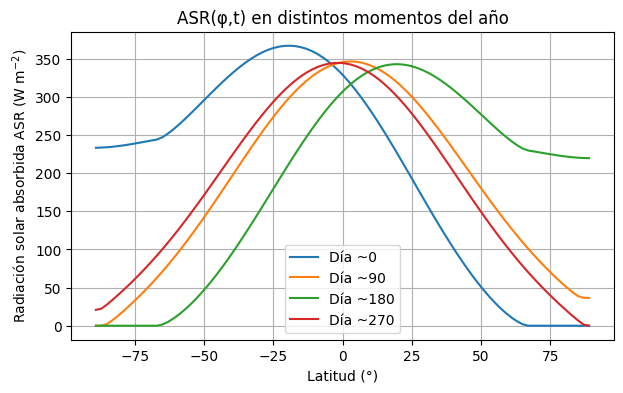

In [8]:
plt.figure(figsize=(7,4))
for d, i in zip(days_to_plot, idx):
    plt.plot(lat, ASR_year[:, i], label=f"Día ~{d}")

plt.xlabel("Latitud (°)")
plt.ylabel("Radiación solar absorbida ASR (W m$^{-2}$)")
plt.title("ASR(φ,t) en distintos momentos del año")
plt.legend()
plt.grid(True)
plt.show()


### Resumen anual: medias anuales

Además de las variaciones estacionales, es útil considerar la media anual.

La media anual de Q y de ASR como función de la latitud resume el “patrón energético” que, en última instancia, está detrás del gradiente latitudinal de temperatura (zonas cálidas cerca del ecuador y frías hacia los polos).


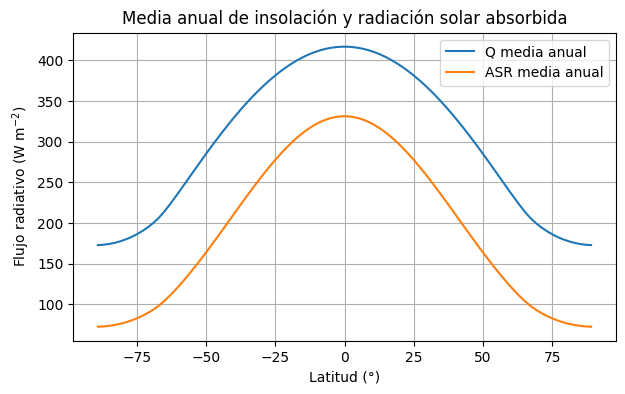

In [9]:
Q_ann = Q_year.mean(axis=1)
ASR_ann = ASR_year.mean(axis=1)

plt.figure(figsize=(7,4))
plt.plot(lat, Q_ann, label="Q media anual")
plt.plot(lat, ASR_ann, label="ASR media anual")
plt.xlabel("Latitud (°)")
plt.ylabel("Flujo radiativo (W m$^{-2}$)")
plt.title("Media anual de insolación y radiación solar absorbida")
plt.legend()
plt.grid(True)
plt.show()


## Radiación infrarroja saliente (OLR)

Además de absorber energía solar, el sistema climático pierde energía hacia el espacio en forma de **radiación infrarroja**.

En los modelos de balance energético, este término se representa mediante una parametrización sencilla que relaciona la radiación infrarroja emitida con la temperatura superficial que hay en cada latitud.

En este modelo, la radiación infrarroja saliente (OLR) se parametriza de forma lineal como:

OLR = A + B · Tₛ

donde:
- **Tₛ** es la temperatura superficial,
- **A** y **B** son parámetros constantes del modelo.

Esta relación expresa, de forma muy simplificada, que un sistema más cálido emite más radiación infrarroja hacia el espacio.


La parametrización lineal de la OLR no pretende describir en detalle los procesos radiativos reales de la atmósfera.

Su objetivo es capturar dos ideas fundamentales:
- existe una pérdida de energía incluso cuando la temperatura es baja (término A);
- la radiación infrarroja emitida aumenta con la temperatura (término B · Tₛ).

Esta formulación permite estudiar de forma clara cómo el equilibrio energético del sistema depende de la temperatura y cómo responde ante perturbaciones externas.


<div style="color: #555555; font-size: 0.95em;">

### Nota aclaratoria: ¿por qué uitlizar una dependencia lineal de la temperatura en OLR?

En la física de la radiación térmica, la emisión infrarroja de un cuerpo negro es proporcional a la cuarta potencia de la temperatura (ley de Stefan–Boltzmann):

$$
E \propto T^4
$$

En este modelo no se utiliza directamente esa dependencia, sino una **aproximación lineal** de la forma:

$$
\text{OLR} = A + B\,T_s
$$

Esta expresión **no contradice** la ley de Stefan–Boltzmann.  
Puede interpretarse como una **linealización** de \($T^4$\) alrededor de una temperatura de referencia representativa del clima medio del sistema.

Dicho de otro modo, el modelo no pretende describir la emisión infrarroja absoluta en todas las condiciones posibles, sino **cómo cambia la radiación emitida cuando la temperatura se desvía moderadamente de un estado climático de referencia**.

Esta aproximación es habitual en modelos climáticos idealizados y permite:
- simplificar el análisis del equilibrio energético,
- aislar los mecanismos de retroalimentación más importantes,
- y mantener el modelo lo suficientemente simple como para ser interpretado de forma directa.

No es necesario seguir este razonamiento en detalle para realizar la práctica: basta con retener la idea física esencial de que **un sistema más cálido emite más radiación infrarroja hacia el espacio**.
</div>

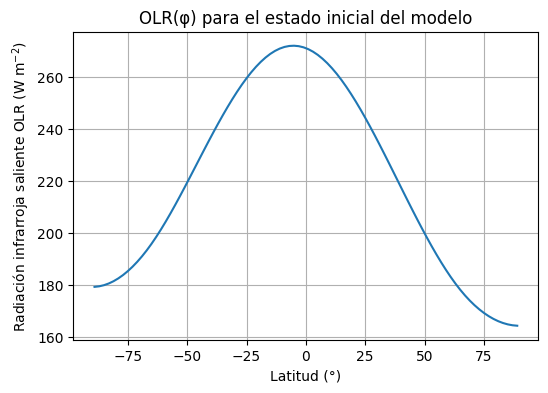

In [10]:
# Radiación infrarroja saliente por latitud (estado inicial)
OLR0 = np.array(m.diagnostics['OLR']).ravel()

plt.figure(figsize=(6,4))
plt.plot(lat, OLR0)
plt.xlabel("Latitud (°)")
plt.ylabel("Radiación infrarroja saliente OLR (W m$^{-2}$)")
plt.title("OLR(φ) para el estado inicial del modelo")
plt.grid(True)
plt.show()


La figura muestra cómo la radiación infrarroja saliente varía con la latitud, reflejando indirectamente la distribución latitudinal de la temperatura.

Las regiones más cálidas emiten más radiación infrarroja, mientras que las regiones más frías emiten menos.

Esta dependencia entre temperatura y OLR es uno de los mecanismos clave que estabilizan el sistema climático: un aumento de temperatura tiende a incrementar la pérdida de energía hacia el espacio.


En cada latitud, el balance energético local resulta de la competencia entre:
- la radiación solar absorbida (ASR),
- la radiación infrarroja emitida (OLR),
- y el transporte de energía entre regiones.

Cuando se promedia sobre todo el planeta y sobre un ciclo anual completo, el sistema alcanza un estado en el que la energía entrante y saliente se compensan en promedio.

Este equilibrio global no implica que ASR y OLR sean iguales en cada latitud, sino que el balance neto se anula al considerar el conjunto del sistema.


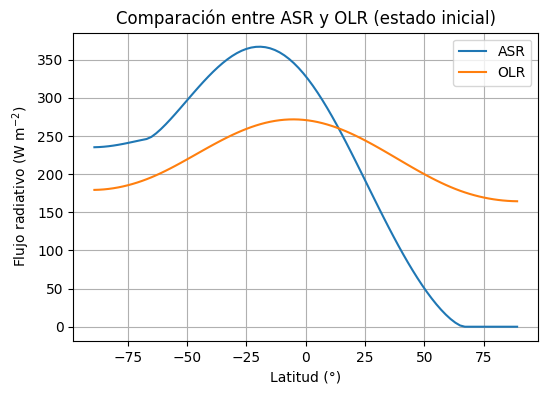

In [11]:
ASR0 = np.array(m.diagnostics['ASR']).ravel()

plt.figure(figsize=(6,4))
plt.plot(lat, ASR0, label="ASR")
plt.plot(lat, OLR0, label="OLR")
plt.xlabel("Latitud (°)")
plt.ylabel("Flujo radiativo (W m$^{-2}$)")
plt.title("Comparación entre ASR y OLR (estado inicial)")
plt.legend()
plt.grid(True)
plt.show()


La comparación entre ASR y OLR muestra que, en el estado inicial del modelo, el balance energético no es nulo en todas las latitudes.

Este desequilibrio energético inicial es el motor de la evolución temporal de la temperatura.

Al integrar el modelo en el tiempo, la temperatura se ajusta progresivamente hasta alcanzar un régimen en el que el balance energético medio se compensa. Este proceso de ajuste se denomina *spin-up* y se analizará explícitamente en el siguiente notebook.


## Transporte meridional de energía

El balance energético local entre ASR y OLR no es suficiente para describir la distribución espacial de la temperatura.

En el sistema climático real, la atmósfera y los océanos transportan energía desde regiones con exceso de energía (bajas latitudes) hacia regiones con déficit energético (altas latitudes).

En el modelo EBM 1D, este transporte se representa mediante un **término difusivo** que tiende a suavizar los gradientes latitudinales de temperatura.

Este término no describe explícitamente los mecanismos físicos del transporte, sino su efecto neto: redistribuir energía a lo largo de las latitudes.


El transporte meridional cumple un papel esencial en el equilibrio climático:

- reduce los contrastes térmicos entre el ecuador y los polos;
- permite que regiones con déficit radiativo mantengan temperaturas más altas de las que tendrían en ausencia de transporte;
- contribuye a la estabilidad del sistema climático.

Sin transporte meridional, el gradiente latitudinal de temperatura sería mucho más acusado.


Hasta ahora se han analizado términos individuales del balance energético en un estado inicial del modelo.

Para obtener el clima que resulta de la combinación de todos estos procesos, es necesario **integrar el modelo en el tiempo** hasta que alcance un régimen estacionario.

En este régimen:
- la temperatura oscila de forma periódica a lo largo del año;
- el patrón espacial y temporal se repite de un año a otro;
- el balance energético medio global es aproximadamente nulo.

A continuación se muestra el estado climático resultante tras un periodo de integración suficiente.


In [12]:
# Integramos el modelo durante varios años para alcanzar el régimen estacional
m.integrate_years(20)


Integrating for 1800 steps, 7304.844000000001 days, or 20 years.
Total elapsed time is 20.99999999999939 years.


### Temperatura media anual como función de la latitud

La siguiente figura muestra la temperatura superficial media anual resultante del modelo una vez alcanzado el régimen estacionario.

Este perfil resume el clima medio del sistema:
- temperaturas más altas en bajas latitudes;
- temperaturas más bajas hacia los polos;
- un gradiente suavizado por el transporte meridional.


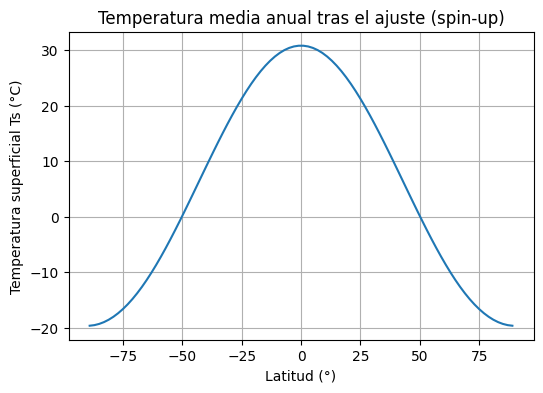

In [14]:
# Almacenamos un año completo tras el spin-up
lat = m.state['Ts'].domain.axes['lat'].points
dt_days = m.timestep / 86400.0
nsteps_year = int(round(365.0 / dt_days))

Ts_year = np.zeros((len(lat), nsteps_year))

for k in range(nsteps_year):
    m.step_forward()
    Ts_year[:, k] = np.array(m.state['Ts']).ravel()

# Media anual
Ts_ann = Ts_year.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(lat, Ts_ann)
plt.xlabel("Latitud (°)")
plt.ylabel("Temperatura superficial Ts (°C)")
plt.title("Temperatura media anual tras el ajuste (spin-up)")
plt.grid(True)
plt.show()


Además del perfil medio anual, el modelo reproduce un **ciclo estacional de la temperatura** cuya amplitud depende de la latitud.

A continuación se muestra la evolución de la temperatura a lo largo de un año en varias latitudes representativas.


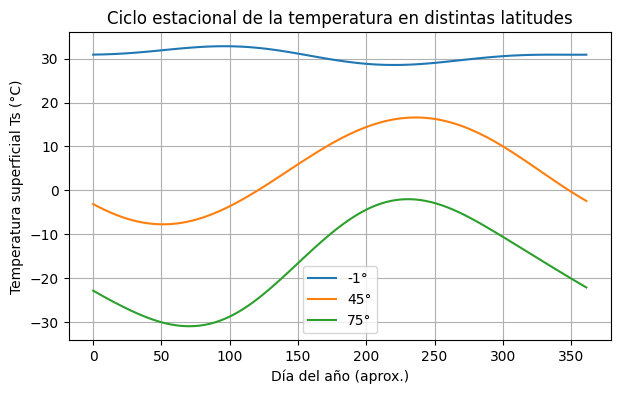

In [15]:
# Latitudes representativas
target_lats = [0, 45, 75]
idx = [int(np.argmin(np.abs(lat - x))) for x in target_lats]

time_days = np.arange(nsteps_year) * dt_days

plt.figure(figsize=(7,4))
for x, i in zip(target_lats, idx):
    plt.plot(time_days, Ts_year[i, :], label=f"{lat[i]:.0f}°")

plt.xlabel("Día del año (aprox.)")
plt.ylabel("Temperatura superficial Ts (°C)")
plt.title("Ciclo estacional de la temperatura en distintas latitudes")
plt.legend()
plt.grid(True)
plt.show()


Las figuras muestran el comportamiento climático del modelo una vez alcanzado el régimen estacionario:

- el gradiente latitudinal de temperatura refleja la distribución media de la radiación solar;
- el ciclo estacional es débil cerca del ecuador y más intenso en latitudes medias y altas;
- el transporte meridional contribuye a suavizar los contrastes térmicos.

Este estado climático es el punto de partida para los experimentos que se realizarán en los siguientes notebooks.


## Resumen

En este cuaderno se ha introducido el modelo climático de balance energético 1D que se utilizará en la práctica:

- se ha presentado la ecuación conceptual del modelo;
- se han analizado sus términos físicos (ASR, OLR y transporte);
- se ha mostrado cómo estos términos se implementan en climlab;
- se ha obtenido el estado climático resultante tras la integración temporal.

En el siguiente notebook, este modelo se utilizará como un laboratorio numérico para estudiar su respuesta a forzamientos radiativos externos.
